# Домашнее задание по Matplotlib и Seaborn
# Pro

### *Часть 1. Matplotlib*

In [ ]:
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 
import pandas as pd 

### **Задача 1**

Используя библиотеку Matplotlib, для датасета "Ирисы", который подгружается кодом ниже, нарисуйте точечную диаграмму (scatter plot) всех четырех признаков. Каждый признак должен быть нарисован на отдельном графике. Используйте для этого subplot формата 2 на 2. Графики должны быть читаемыми, т. е. отрегулируйте размер subplot'ов. Добавьте названия признаков к каждому графику в качестве имени графика. Используйте метки классов (y) в качестве цветовой разметки. Добавьте расшифровку цветов, соответствующих меткам классов, в качестве лейблов.

P.S. Используйте функцию plt.scatter(x, y, color).

In [ ]:
from sklearn import datasets
data = datasets.load_iris(return_X_y=False)
X = data.data      # Данные по видам  тип numpy.ndarray
y = data.target    # Названия видов   тип numpy.ndarray

### **Решение:**

In [ ]:
# Вытаскиваем имена признаков
names = data.feature_names 
target_names = data.target_names

print ("Названия столбцов: ", names)
print ("Названия цветков:  ", target_names)

Названия столбцов:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Названия цветков:   ['setosa' 'versicolor' 'virginica']


In [ ]:
# Удобнее будет работать с DataFrame, поэтому для начала создадим новый заголовок
columns = names + ['target']
# Создадим датафрейм с новым заголовком
df = pd.DataFrame(np.hstack([X, y.reshape(-1,1)]), columns=columns) # присоединяем колонку под новым названием

df['target_names'] = 'setosa'
df.loc[df.target==1, 'target_names'] = 'versicolor' # присваиваем значение versicolor столбику target_names, значение которого target==1
df.loc[df.target==2, 'target_names'] = 'virginica'
df.head()

# Имея данный датафрейм приступим к отображению данных на графиках

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


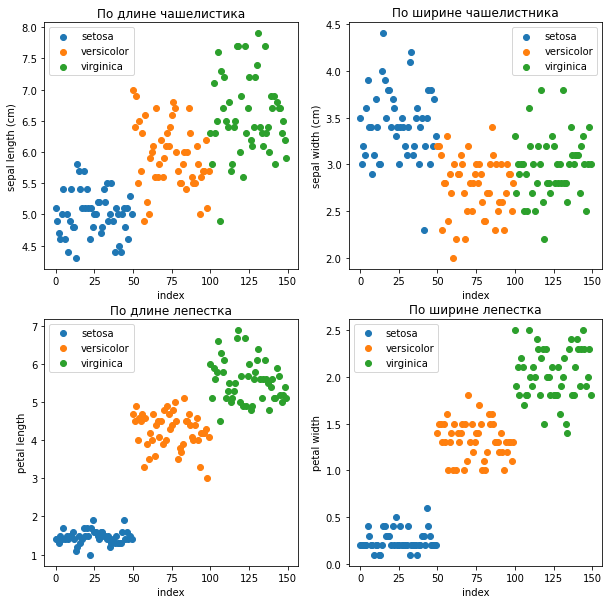

In [ ]:
# Зададим общий размер полотна
plt.figure(figsize=(10,10))

# Так как в задании написано с функцией subplot, а не subplots, то будем работать с ней

plt.subplot(2,2,1)                                                      # Зададим количество полотен 2 строки, 2 столбца. Работаес с первым полотном
plt.scatter(df.index[:50], df.iloc[:50,0], label='setosa')              # Отобразим данные (sepal length) для цветка 'setosa'. Столбец 0, первые 50 значений
plt.scatter(df.index[50:100], df.iloc[50:100,0], label='versicolor')    # Отобразим данные (sepal length) для цветка 'versicolor'. Столбец 0, значения  от 50 до 100
plt.scatter(df.index[100:150], df.iloc[100:150,0], label='virginica')   # Отобразим данные (sepal length) для цветка 'virginica'. Столбец 0, значения  от 100 до 150
plt.xlabel('index')                                                     # Зададим имя оси х
plt.ylabel('sepal length (cm)')                                         # Зададим имя оси у
plt.title('По длине чашелистика')                                       # Общее название графика
plt.legend()                                                            # Выведем легенду

# Аналогично будем выводить второй график уже для значений 'sepal width'. Это будет первый(1) столбец. И так далее с 3 и 4 графиками
plt.subplot(2,2,2)
plt.scatter(df.index[:50], df.iloc[:50,1], label='setosa')
plt.scatter(df.index[50:100], df.iloc[50:100,1], label='versicolor')
plt.scatter(df.index[100:150], df.iloc[100:150,1], label='virginica')
plt.xlabel('index')
plt.ylabel('sepal width (cm)')
plt.title('По ширине чашелистника')
plt.legend()

plt.subplot(2,2,3)
plt.scatter(df.index[:50], df.iloc[:50,2], label='setosa')
plt.scatter(df.index[50:100], df.iloc[50:100,2], label='versicolor')
plt.scatter(df.index[100:150], df.iloc[100:150,2], label='virginica')
plt.xlabel('index')   
plt.ylabel('petal length')
plt.title ('По длине лепестка')
plt.legend()

plt.subplot(2,2,4)
plt.scatter(df.index[:50], df.iloc[:50,3], label='setosa')
plt.scatter(df.index[50:100], df.iloc[50:100,3], label='versicolor')
plt.scatter(df.index[100:150], df.iloc[100:150,3], label='virginica')
plt.xlabel('index')
plt.ylabel('petal width')
plt.title ('По ширине лепестка')
plt.legend()

plt.show()

# Код получился длинным. Но зато с полным понимаем что внутри. И в нем прослеживатся определенная закономерность, поэтому его можно сделать короче используя цикл for.
# Еще один момент. Здесь происходит раздление по оси 'x' на три группы по индексу (до 50, от 50 до 100 и от 100 до 150).
# Поэтому кажется что признаки могут не пересекатся. Например на первом графике кажется, что значения цветка 'setosa'(синий цвет) стоят обособленно.
# Поэтому сейчас сделаем по оси 'x' 50 значений, столько сколько для каждого цветка, чтобы понять где они пересекаются. С циклом for.

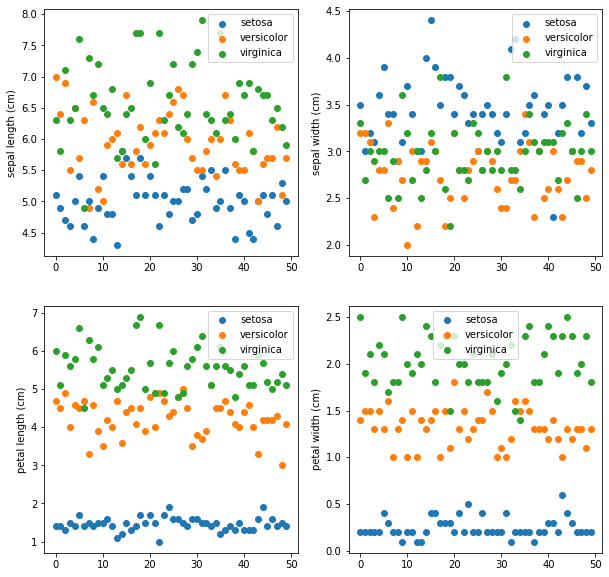

In [ ]:
# Второй способ для примера. Без подписей графиков
plt.figure(figsize=(10,10))

for i in range(4):
  plt.subplot(2,2,i+1)
  plt.scatter(df.index[:50], df.iloc[:50,i], label=target_names[0])
  plt.scatter(df.index[:50], df.iloc[50:100,i], label=target_names[1])
  plt.scatter(df.index[:50], df.iloc[100:150,i], label=target_names[2])
  plt.ylabel(names[i])
  plt.legend()

  # На втором графике видно, что значения всех цветков пересекаются. А на 3 и 4 графиках значения цветков 'versicolor' и 'virginica' тоже пересекаются. 

### **Задача 2**

Используя библиотеку Matplotlib, постройте гистограмму для первого признака в датасете выше следующим образом:
* на одном графике должно быть три гистаграммы, по одной на каждый класс,
* для этого используйте методологии подвыборки массива с условием,
* количество бинов должно определяться автоматически (режим "auto"),
* гистограмма должна быть читаемой, т. е. добавьте подписи, лейблы, названия и т. д.

### **Решение:**

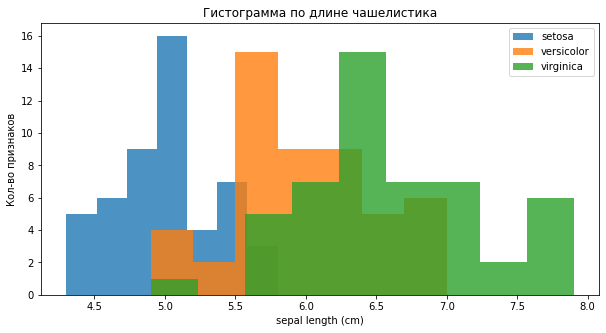

In [ ]:
plt.figure(figsize=(10,5))

# Так как графики пересекаются(наслаиваются друг на друга), используем параметр alpha

plt.hist(df.iloc[:50,0], label='setosa', bins = 'auto', alpha = 0.8)           
plt.hist(df.iloc[50:100,0], label='versicolor', bins = 'auto', alpha = 0.8)
plt.hist(df.iloc[100:150,0], label='virginica', bins = 'auto', alpha = 0.8)

plt.xlabel('sepal length (cm)')
plt.ylabel('Кол-во признаков')
plt.title('Гистограмма по длине чашелистика')

plt.legend()
plt.show()

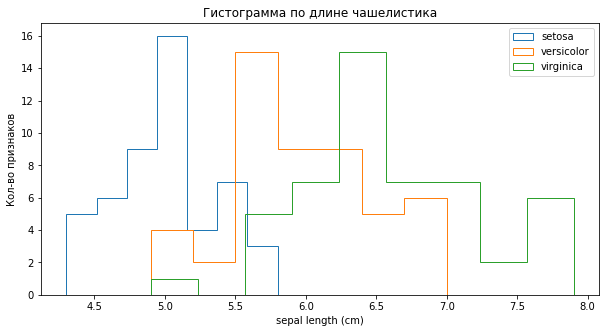

In [ ]:
# Или  можно использовать другой тип гистограммы для наглядности
plt.figure(figsize=(10,5))

plt.hist(df.iloc[:50,0], label='setosa', bins = 'auto', histtype = 'step')
plt.hist(df.iloc[50:100,0], label='versicolor', bins = 'auto', histtype = 'step')
plt.hist(df.iloc[100:150,0], label='virginica', bins = 'auto', histtype = 'step')

plt.xlabel('sepal length (cm)')
plt.ylabel('Кол-во признаков')
plt.title('Гистограмма по длине чашелистика')

plt.legend()
plt.show()

### **Задача 3**

Используя библиотеку Matplotlib, посчитайте матрицу корреляции между признаками и нарисуйте ее как heatmap. Подберите подходящую по смыслу цветовую гамму. Добавьте названия признаков в качестве тиков по осям. Добавьте отрисовку цветовой шкалы.

### **Решение:**

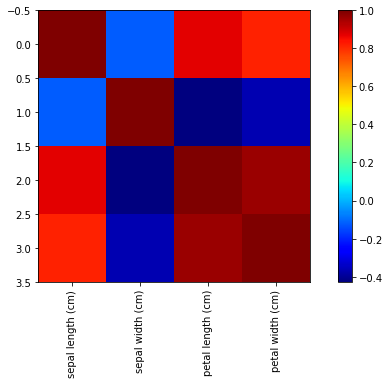

In [ ]:
plt.figure(figsize=(10,5))

# Удалим лишнии столбцы в датафрейм и создадим новый
df_heatmap = df.drop(['target', 'target_names'], axis=1)

# С помощью функции .corr() вычислим корреляцию между значениями признаков и запишем их в переменную corr
corr = df_heatmap.corr()                  

# Построим тепловую карту
plt.imshow(corr, cmap ='jet')

plt.colorbar()                                  # Добавим цветовую шкалу
plt.xticks(range(4), names, rotation = 90)      # Так как подписей будет 4 используем функцию range. И чтобы подписи не были друг на друге развернем на 90 градусов
plt.show()

### *Часть 2. Seaborn*

### **Задача 4**

Для датасета Occupancy (datatraining.txt) постройте диаграмму присутствия в разбивке по часам и меткам классов. Для этого сделайте следующее:
*   создайте новый столбец "hour", отвечающий соответствующему часу, 
*   нарисуйте sns.countplot этого столбца в разбивке по Occupancy.

In [ ]:
from google.colab import drive 
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


### **Решение:**

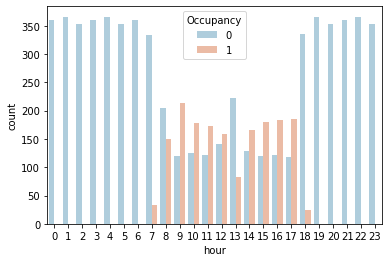

In [ ]:
# Создаем новый датафрейм из файла datatraining.txt
data = pd.read_csv('/content/drive/MyDrive/NU/05 Matplotlib и Seaborn/datatraining.txt')

# Превратим колонку date в DateTime index  
data.index = pd.to_datetime(data.date)

# Удалим столбец date
data.drop('date', axis = 1, inplace = True)

# Cоздайте новый столбец "hour", отвечающий соответствующему часу
data['hour'] = data.index.hour 

# С помощью функции sns.countplot построим диаграмму присутствия в разбивке по часам
sns.countplot(data = data, x = data.hour, hue = 'Occupancy', palette = 'RdBu_r')
plt.show()

# По графику видно присутствие с 7 до 19 часов 

### **Задача 5**

Сделайте resample данных по получасовому интервалу с использованием усреднения для всех признаков.

Постройте sns.jointplot между признаками Light и CO2.

### **Решение:**

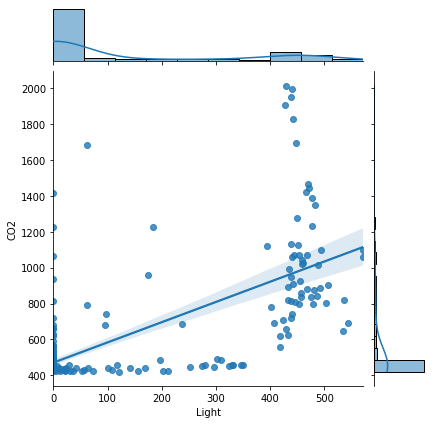

In [ ]:
# Удалим столлбец hour который остался из прошлой задачи и запишем все в новую переменную data_res
data_res = data.drop('hour', axis = 1)

# Делаем resample данных по интервалу в 30 минут для всех признаков
# Хоть колонка 'Occupancy' не является признаком, а лишь говорит о присутствии/отсутствии 1 или 0. Но она на данный график не влияет
data_30min = data_res.resample('30min').mean()

# Построим визуализацию совместных распределений с помощью функции joinplot
sns.jointplot(data = data_30min, x = 'Light', y = 'CO2', kind ='reg')   # Для наглядности выберем типо графика 'reg'
plt.show()